# <b>DSCI-100 Project Final Report</b>

**Names:** Ziwangyue Yin, Kevin Li, Zihao Yang, and Kyle Li\
**Section:** 003\
**Group:** 9\
**Date:** _______, 2025

In [1]:
## Necessary Components to Preload

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## <b>(1.0) Introduction:</b>

### 1.1 Background Information:

The data we are provided in this project are the _players.csv_ and _sessions.csv_ datasets which originate from a Minecraft server run by a research group known as "The Pacific Laboratory for Artificial Intelligence (PLAI)" in Computer Science at UBC. These researchers' goal of this Minecraft server is to ultimately use player input data to train AI. However, such a process is not only expensive, but also resource demanding! As such, they seek to recruit specific players who are more likely to contribute valuable/meaningful data on this Minecraft server. Thus, with this goal in mind, we will only be analyzing the _players.csv_ in this report due to the fact that the predictive question we aim to answer doesn't require the _sessions.csv_ dataset. This _players.csv_ dataset simply contains unique data in relation to each individual who has participated in the server. Details will be further explained in section 1.3 below. In addition to this, the specificity of the question we wish to answer will also be expanded upon in the subsequent section. It is important to note that the _players.csv_ data presented was gathered via self-reporting during server signup and compiled into a csv by the researchers. Therefore, the data collected may contain untruthful information that does not reflect a player's true results since signups were self-reported! Once again, the goal of this project report is to help the researchers determine players who will actually provide meaningful data. This will be hopefully achieved via the  tidying the _players.csv_ dataset, altering the data to better fit our specific question, visualizations by plotting, data analysis using techniques like K-nearest neighbors (KNN) classification, and finally visualizing these analysis techniques in an attempt to ultimately answer our formulated question! These processes will all be simulated in Jupyter Notebook using the coding language R-Script! 

### 1.2 Questions We Will Attempt to Answer:

### 1.2.1 Broad Question:

In reference to the Data Science Project: Planning Stage (Individual) - where we were provided three different broad questions - we have chosen broad question number one: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types" (University of British Columbia, Department of Statistics, 2025)?

### 1.2.2 Specific Question:

Expanding on our chosen broad question, we wonder whether or not a player’s experience and age can be used to accurately predict their game-related newsletter subscription status as given in the _players.csv_ dataset? 

### 1.3 Dataset Description:

In this section, we are firstly going to create an overview of _players.csv_. Subsequently, we will then identify and define the characteristics of the entire dataset and finally summarize its statistics. In addition to this, potential worries regarding this _players.csv_ dataset will be noted at the very end of this section! 

<u><b>Overview of Players Dataset:</u></b>
| Dataset | Number of Observations | Number of Variables | Represents |  
|:-----|:---:|:---:|:-----|
| players.csv | 196 | 7 | Data and list of all unique players involved with the server. |

<u><b>Player Dataset:</u></b>

**a) Variables**
| Variable | Type | Short Description |
|:-----|:-----|:-----|
| experience | Character | Self-reported level of experience with Minecraft. This ranged from Beginner -> Amateur -> Reguler -> Veteran -> Pro |
| subscribe | Logical (T/F) | Whether a player had suscribed to a game-related newsletter (yes = True, no = False) |
| hashedEmail | Character | Unique identifier of each player (anonymizing their emails via hashing) |
| played_hours | Numeric (dbl) | Hours spent on the Minecraft server for each participant |
| name | Character | First names (not gamertag) of each individual participating|
| gender | Character | Gender of each individual participating |
| Age | Numeric (dbl) | Age in years of each individual participating |

**b) Summary Statistics**
| Variable | Value (round to 2 decimals if possible) | 
|:-----|:-----:|
| Mean Age | 21.14 |
| Youngest Age | 9 |
| Oldest Age | 58 |
| Standard Deviation of Age | 7.39 | 
| Mean Hours Played | 5.85 |
| Highest Number of Hours Played | 223.1|
| Lowest Number of Hours Played | 0 |
| Standard Deviation of Hours Played | 28.36 | 
| Number of Players | 196 | 
| Proportion Subscribed (%) | 73.47 | 

Note: Since we know that each player (196 total) has a unique identifier and a first name, we also know that the number of hashed emails and names also equal to 196. Furthermore, for the sake of simplicity, we will not be presenting gender or experience proportions in the Summary Statistics table.

<u><b>Possible Concerns/Potential Issues:</u></b>
- Players may have overestimated or underestimated their abilities when stating their experience 
- Hours played may not be as exact since it seems to be rounded to 1 decimal in the dataset thus, those who log in for a few minutes may be reported as 0hrs
- Many players show 0 hours played which may indicate logging errors or lack of participation which may skew results
- People involved with this server may have submitted incorrect information e.g. gender, age, game-related newsletter subscription, etc.
- Factors outside of Minecraft may have influenced their ability to play on the server such as heavy workloads, access to a device that can properly run Minecraft, less of a workload which may lead to an abnormal increase of playtime, and etc.

## <b>(2.0) Methods & Results:</b>

To answer our specific question, the first thing we need to determine is which method we will use for prediction. For predicting subscription status, we will use the K-nearest neighbors (KNN) classification method.  
The reason for this choice is that classification aims to predict a categorical class for an observation based on its other variables, and in our case, subscription status is a categorical variable.

### 2.1 Loading Dataset:

Since we only require the _players.csv_ dataset for our project, we will firstly need to load it.\
As such:

In [2]:
url_players <- "https://raw.githubusercontent.com/Sandyyyin/project_final_report/refs/heads/main/players.csv"
players_data <- read_csv(url_players)

players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### 2.2 Wrangling Data:

First, we select the response variable (subscribe) and two explanatory variables (experience and age). We noticed that there are NA values in the age variable, which are uninformative. Therefore, we removed these records.

In [3]:
wrangling_players_data <- players_data |>
    select(subscribe, experience, Age) |>
    filter(!is.na(Age))

Since we will be working with subscribe as a categorical variable, it is a good idea to convert it to a factor type. In addition, because KNN classification uses distances for prediction, it is necessary to convert experience to a numerical type. Also, double checked experience as a factor and also ensure that it was ordered like so: Beginner --> Amateur --> Regular --> Veteran --> Pro.

In [4]:
wrangling_players_data <- wrangling_players_data |>
    mutate(subscribe = as_factor(subscribe), 
           experience=factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"),
           ordered=TRUE))

wrangling_players_data

subscribe,experience,Age
<fct>,<ord>,<dbl>
TRUE,Pro,9
TRUE,Veteran,17
FALSE,Veteran,17
⋮,⋮,⋮
FALSE,Veteran,22
FALSE,Amateur,57
FALSE,Amateur,17


### 2.3 Visualization:

Note: Keep in mind that for 'Subscription Status', TRUE = subscribed to game-related newsletter and FALSE = not subscribed to the newsletter! 

#### 2.3.1 Bar Plot of Experience Distribution by Subscription Status:

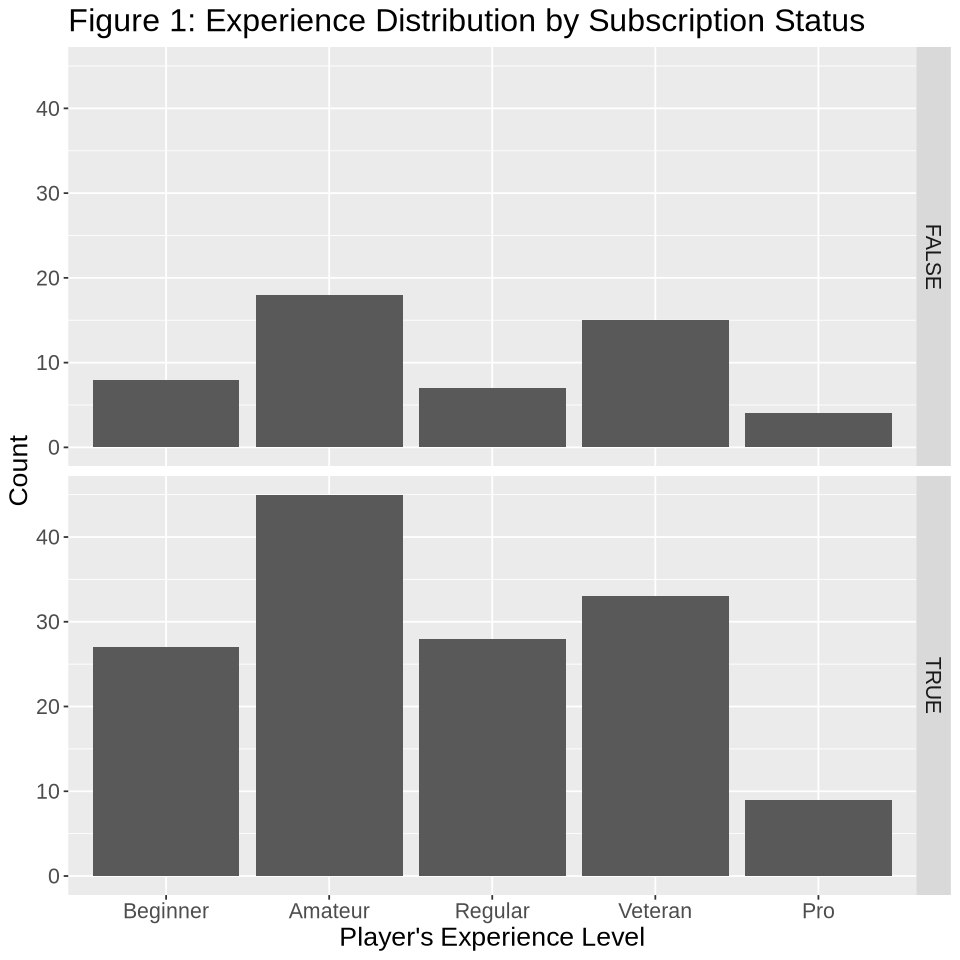

In [5]:
options(repr.plot.width = 8, repr.plot.height = 8) 

experi_subs <- wrangling_players_data |>
    ggplot(aes(x = experience)) +
    geom_bar() +
    facet_grid(subscribe ~ .) +
    labs(x = "Player's Experience Level",
         y = "Count",
         title = "Figure 1: Experience Distribution by Subscription Status")+
    theme(text = element_text(size = 16))

experi_subs

#### 2.3.1 Bar Plot of Age Distribution by Subscription Status:

For visualization, age is grouped in the bar plot to make the distribution clearer and easier to compare across subscription statuses.

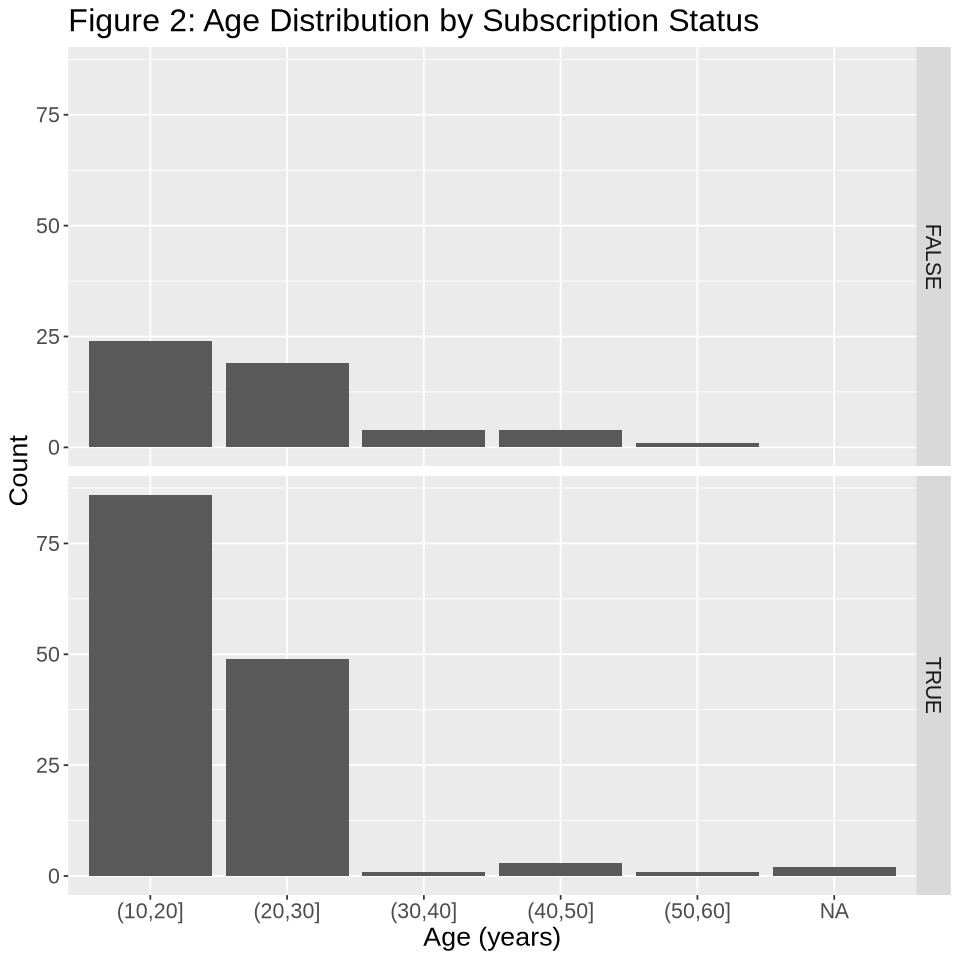

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8) 

age_group_players_data <- wrangling_players_data |>
    mutate(age_group = cut(Age, breaks = seq(10, 60, by = 10)))

age_subs <- age_group_players_data |>
    ggplot(aes(x = age_group)) +
    geom_bar() +
    facet_grid(subscribe ~ .) +
    labs(x = "Age (years)",
         y = "Count",
         title = "Figure 2: Age Distribution by Subscription Status")+
    theme(text = element_text(size = 16))

age_subs

### 2.4 Evaluating performance

#### 2.4.1 Create the Training and Test Split:

In [7]:
set.seed(2222)

players_split <- initial_split(wrangling_players_data, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

#### 2.4.2 Preprocess the Data:

Experience is a categorical variable, so we use one-hot encoding to turn each level into separate 0/1 columns. This way, KNN can measure distances properly and treat all experience levels equally, improving the accuracy of the classification.

In [8]:
players_recipe <- recipe(subscribe ~ Age + experience, data = wrangling_players_data) |>
  step_dummy(experience) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())

#### 2.4.3 Tuning the Classifier (cross-validation & parameter value selection):

In [9]:
set.seed(2222)

players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

k_values <- tibble(neighbors = seq(from = 3, to = 99, by = 3))

knn_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode ("classification")

knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = k_values) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")

#### 2.4.4 Visualization of Neighbor Analysis

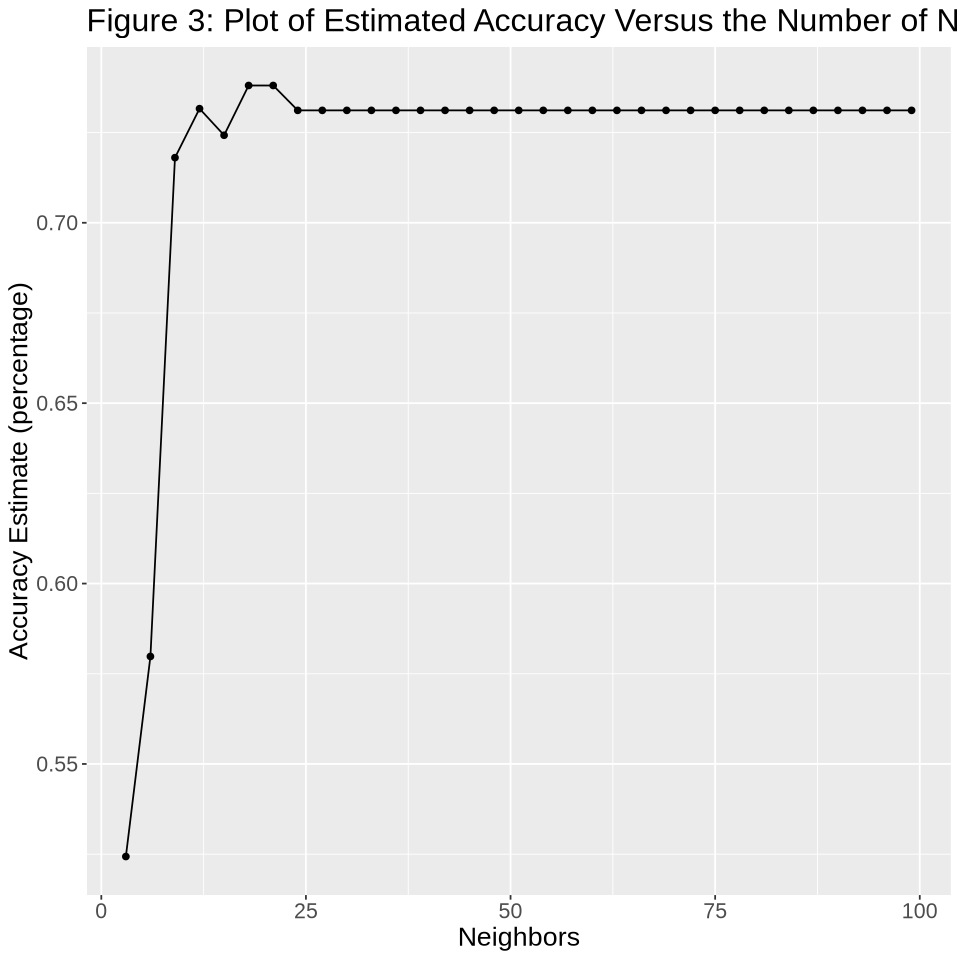

In [18]:
set.seed(2222)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors",
         y = "Accuracy Estimate (percentage)",
        title = "Figure 3: Plot of Estimated Accuracy Versus the Number of Neighbors") +
    theme(text = element_text(size = 16))

accuracy_vs_k

#### 2.4.5 Best K-Nearest Neighbor:

In [11]:
set.seed(2222)

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

print("best k is")
best_k

[1] "best k is"


[1] 18

#### 2.4.6 Training the Classifier:

In [12]:
knn_spec_best <- nearest_neighbor (weight_func = "rectangular", neighbors = 24) |>
    set_engine("kknn") |>
    set_mode ("classification")

knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec_best) |>
    fit(data = players_train) 

#### 2.4.7 Predicting the Labels in the Test Set:

In [13]:
players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

players_test_predictions

.pred_class,subscribe,experience,Age
<fct>,<fct>,<ord>,<dbl>
TRUE,FALSE,Amateur,21
TRUE,TRUE,Amateur,47
TRUE,TRUE,Veteran,22
⋮,⋮,⋮,⋮
TRUE,FALSE,Beginner,17
TRUE,TRUE,Veteran,17
TRUE,FALSE,Beginner,32


#### 2.4.8 Evaluating Performance (accuracy & precision & recall):

In [14]:
players_accuracy <- players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
players_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857


In [15]:
# check the order of the labels
players_test_predictions |> pull(subscribe) |> levels()

[1] "FALSE" "TRUE"

In [16]:
players_precision <- players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")
players_precision

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7291667


In [17]:
players_recall <- players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")
players_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9722222


## <b>(3.0) Discussion:</b>

Requirement:
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

In this project report, we have acrued numerous results via our data anaylsis and the subsequent visualizations!

## <b>(4.0) GitHub Link:</b>

https://github.com/Sandyyyin/project_final_report.git

## <b>(5.0) References:</b>

University of British Columbia, Department of Statistics. (2025). Project planning stage (individual).\ DSCI 100: Introduction to Data Science. 
https://canvas.ubc.ca/courses/171896/assignments/2244255?module_item_id=8385524
